<div><div style="text-align:left;display:inline-block;float:left"><code>Eduardo Cardenas</code></div> <div style="text-align:right;display:inline-block;float:right"><code>Computación Científica - UNMSM</code></div></div>
<hr width=100% align=center>
<h1 style="text-align:center">Método Crank Nicolson - Ecuación del Calor</h1>

Vamos aplicar este método a la ecuación del calor :

$$
\begin{cases}
 \dfrac{\partial u}{\partial t} = c^2 \dfrac{\partial^2 u}{\partial x^2} & \text{para } (x,t) \in (a,b)\times(0,T)\\ 
 {\scriptsize\mbox{ tal que}} & \\ 
 u(x,0) = f(x) & \text{para } x\in(a,b)    \\
 u(a,t) = 0 = u(b,t)  & \text{para } t\in(0,T)
\end{cases} 
$$

Denotamos la siguiente partición:
$$h = \frac{b-a}{m}, \qquad k = \frac{T}{n} \quad \mbox{tal que} \quad x_{i+1} = x_i + h, \qquad t_{j+1} = t_j + k $$

Utilizamos la siguiente notación :
$$ w_{i,j} = u(x_i,t_j) $$

### Formulas para aproximar las derivadas parciales
Utilizamos las siguientes formulas : 

$$ \frac{\partial u}{\partial t} \simeq \frac{w_{i,j+1} - w_{i,j}}{k}$$

$$ \frac{\partial^2 u}{\partial x^2} \simeq \frac{w_{i+1,j} -2w_{i,j} + w_{i-1,j}}{h^2}$$

## Ahora encontramos la formula para el Método de Crank Nicolson

Conocidas las aproximaciones de las derivadas parciales , reemplazemos sus aproximaciones en la ecuación del calor y luego procederemos a encontrar una formula que nos permita aproximar $w_{i,j+1}$

#### Progresiva: en $t_j$
$$ \frac{ w_{i,j+1} - w_{i,j} }{ k } = c^2\frac{ w_{i+1,j} - 2w_{i,j} + w_{i-1,j}}{h^2}$$

#### Regresiva: en $t_{j+1}$
$$ \frac{ w_{i,j+1} - w_{i,j} }{ k } = c^2\frac{ w_{i+1,j+1} - 2w_{i,j+1} + w_{i-1,j+1}}{h^2}$$

Tomando la media aritmetica de las dos expresiones obtenemos:

$$\frac{ w_{i,j+1} - w_{i,j} }{ k } = \frac{c^2}{2 h^2} ( w_{i+1,j} - 2w_{i,j} + w_{i-1,j} + w_{i+1,j+1} - 2w_{i,j+1} + w_{i-1,j+1} ) $$

Sea $\lambda = \dfrac{c^2 k}{h^2}  $ :

$$ w_{i,j+1} - w_{i,j} = \frac{\lambda}{2}w_{i+1,j} - \lambda w_{i,j} + \frac{\lambda}{2}w_{i-1,j} + \frac{\lambda}{2}w_{i+1,j+1} - \lambda w_{i,j+1} + \frac{\lambda}{2}w_{i-1,j+1} $$

$$ -\frac{\lambda}{2} w_{i-1,j+1} + (1 + \lambda)w_{i,j+1} - \frac{\lambda}{2}w_{i+1,j+1} = \frac{\lambda}{2}w_{i-1,j} + (1-\lambda)w_{i,j} + \frac{\lambda}{2} w_{i+1,j}$$

En forma matricial obtenemos :

$$
\left( \begin{array}{ccccc}
1+\lambda & -\frac{\lambda}{2}    & 0          & \cdots  & 0          \\
-\frac{\lambda}{2}    & 1+\lambda & -\frac{\lambda}{2}    & \cdots  & 0          \\
0          & -\frac{\lambda}{2}    & 1+\lambda & \cdots  & 0          \\
\vdots     & \vdots     & \vdots     & \ddots  & -\frac{\lambda}{2}   \\
0          & 0          & 0          & -\frac{\lambda}{2} & 1+\lambda \\        
\end{array} \right) \left( \begin{array}{c}
w_{1,j+1} \\
w_{2,j+1} \\
w_{3,j+1} \\
\vdots    \\
w_{m-1,j+1}
\end{array} \right) = \left( \begin{array}{ccccc}
1-\lambda & \frac{\lambda}{2}    & 0          & \cdots  & 0          \\
\frac{\lambda}{2}    & 1-\lambda & \frac{\lambda}{2}    & \cdots  & 0          \\
0          & \frac{\lambda}{2}    & 1-\lambda & \cdots  & 0          \\
\vdots     & \vdots     & \vdots     & \ddots  & \frac{\lambda}{2}   \\
0          & 0          & 0          & \frac{\lambda}{2} & 1-\lambda \\        
\end{array} \right)  \left( \begin{array}{c}
w_{1,j} \\
w_{2,j} \\
w_{3,j} \\
\vdots    \\
w_{m-1,j}
\end{array} \right)
$$

$$ Aw^{(j+1)} = Bw^{(j)}$$

Y por fin llegamos a lo esperado :

<p>
<span id="eq01" style="float:right;">(1)</span>$$w^{(j+1)} = A^{-1}(Bw^{(j)})$$</p>

## Código en Python

Utilizando la ecuación <a style="text-decoration:none;" href="#eq01">(1)</a>.

In [13]:
import numpy as np

def tridiag(a,b,c,N):
    A = np.zeros((N,N))
    
    np.fill_diagonal(A[:-1,1:],a)
    np.fill_diagonal(A,b)
    np.fill_diagonal(A[1:,:-1],c)
    
    return A

def metodoCrankNicolson(c, L, T, h, k, f, a, b):
    
    r = c*k/h**2
    m = round(L/h) + 1
    n = round(T/k) + 1
    
    x = np.linspace(0, L, m)
    
    sol = np.zeros((n,m))
    sol[0] = f(x)
    sol[:,0] = a(0) 
    sol[:,-1] = b(L)
    
    A = tridiag(-r/2, 1+r, -r/2, m-2)
    B = tridiag(r/2, 1-r, r/2, m-2)

         
    A_inv = np.linalg.inv(A)


    for i in range(n-1):
        
        C = np.dot(B, sol[i,1:-1])
        C[0]  += r/2*(sol[i+1,0]  + sol[i,0])
        C[-1] += r/2*(sol[i+1,-1] + sol[i,-1])

        sol[i+1,1:-1] = np.dot(A_inv, C)
    
    return sol

### Ejercicio

Resolver el siguiente problema por el Método de Crank Nicolson :

$$
\begin{align*}    
\begin{cases}
 \dfrac{\partial u}{\partial t} = 0.01 \dfrac{\partial^2 u}{\partial x^2} & \\ 
 {\scriptsize\mbox{ tal que}} & \\ 
 u(x,0) = \cos(2\pi x) & \text{para } x \in [0,1]    \\
 u(0,t) = 1 = u(1,t)  & \text{para } t \in \langle 0,1]
\end{cases} 
\end{align*}
$$

El tiempo final $T=0.3$ seg. con h=0.1, k=0.01

### Solución
Utilizamos el método de Crank Nicolson : 

In [15]:
sol_aprox = metodoCrankNicolson(0.01, 1, 0.3, 0.1, 0.01, lambda x: np.cos(2*np.pi*x), lambda x: 1, lambda x: 1)

Tabla de los resultados

In [18]:
import pandas as pd

t = np.linspace(0, 0.3, 31)
xs = np.linspace(0, 1, 11)
data = {"$t$" : t}

for x,sol in zip(xs, sol_aprox.transpose()):
    data["$x={0:.1f}$".format(x)] = sol
    
tabla = pd.DataFrame(data).style.set_properties(width="70px")
tabla

,$t$,$x=0.0$,$x=0.1$,$x=0.2$,$x=0.3$,$x=0.4$,$x=0.5$,$x=0.6$,$x=0.7$,$x=0.8$,$x=0.9$,$x=1.0$
0,0,1,0.809017,0.309017,-0.309017,-0.809017,-1,-0.809017,-0.309017,0.309017,0.809017,1
1,0.01,1,0.805952,0.307839,-0.307839,-0.805933,-0.996188,-0.805933,-0.307839,0.307839,0.805952,1
2,0.02,1,0.802935,0.306666,-0.306665,-0.80286,-0.99239,-0.80286,-0.306665,0.306666,0.802935,1
3,0.03,1,0.799967,0.305498,-0.305496,-0.799799,-0.988606,-0.799799,-0.305496,0.305498,0.799967,1
4,0.04,1,0.797046,0.304336,-0.304331,-0.79675,-0.984837,-0.79675,-0.304331,0.304336,0.797046,1
5,0.05,1,0.794171,0.303179,-0.303171,-0.793713,-0.981083,-0.793713,-0.303171,0.303179,0.794171,1
6,0.06,1,0.791342,0.302029,-0.302015,-0.790687,-0.977343,-0.790687,-0.302015,0.302029,0.791342,1
7,0.07,1,0.788558,0.300884,-0.300864,-0.787672,-0.973617,-0.787672,-0.300864,0.300884,0.788558,1
8,0.08,1,0.785817,0.299747,-0.299716,-0.784669,-0.969905,-0.784669,-0.299716,0.299747,0.785817,1
9,0.09,1,0.78312,0.298617,-0.298573,-0.781678,-0.966207,-0.781678,-0.298573,0.298617,0.78312,1


**Comportamiento de la temperatura en el transcurrir del tiempo**

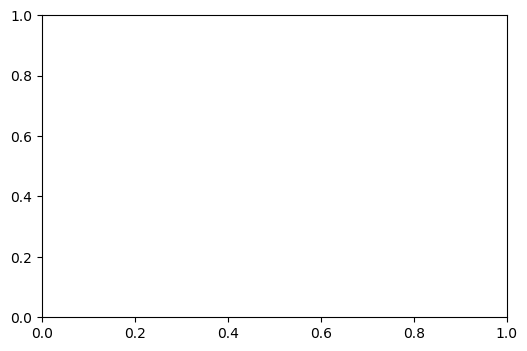

In [22]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from matplotlib import rc
from IPython.display import HTML 

rc('animation', html='jshtml')

fig = plt.figure(figsize=(6.0,4.0), dpi=100)
ax = fig.add_subplot(111)

In [23]:
def init():
    ax.plot([], [])
    ax.grid()
    ax.set_ylabel("Temperatura")
    ax.set_xlabel("Posición en la barra")
    ax.set_title("Variación de la temperatura en la barra")

def animate(i):
    del ax.lines[:]
    ax.plot(xs, sol_aprox[i], color="blue", label="aprox. $t = {0:.2f}$ seg.".format(t[i]))
    ax.legend()
    
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=31, interval=150, repeat=True)

HTML(anim.to_html5_video())